## 머신러닝 학습

### 텍스트 마이닝

#### 데이터 수집

##### 네이버 코로나 뉴스로 감정분석

In [7]:
# 필요 라이브러리 등록
import json
import pandas as pd
import re

In [2]:
with open('./data/코로나_naver_news.json', encoding='utf-8') as f :
    data = json.load(f)

In [5]:
dfData = pd.DataFrame(data)

In [8]:
dfData.head()

,cnt,description,pDate,title
0,1,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",2020-06-04 14:12:00,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;
1,2,▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,2020-06-04 14:12:00,"창녕군, ‘창녕형’비대면 선별진료소 운영"
2,3,"한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",2020-06-04 14:12:00,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정"
3,4,변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,2020-06-04 14:12:00,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]
4,5,이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,2020-06-04 14:12:00,"이재갑 장관, 고용안정지원금 서울센터 방문"


In [10]:
## 한글 이외의 것 모두 제거, title/description
dfData['title'] = dfData['title'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

In [11]:
dfData['description'] = dfData['description'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

In [12]:
dfData.head()

,cnt,description,pDate,title
0,1,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,2020-06-04 14:12:00,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능
1,2,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,2020-06-04 14:12:00,창녕군 창녕형 비대면 선별진료소 운영
2,3,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,2020-06-04 14:12:00,모바일 메인 홍보 모델로 설현 선정
3,4,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,2020-06-04 14:12:00,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰
4,5,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,2020-06-04 14:12:00,이재갑 장관 고용안정지원금 서울센터 방문


In [15]:
dfData[['title', 'pDate', 'description']].to_excel('./data/코로나뉴스_전처리.xlsx', index=False)

In [16]:
dfData = pd.read_excel('./data/코로나뉴스_전처리.xlsx')

dfData.head()

,title,pDate,description
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,2020-06-04 14:12:00,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...
1,창녕군 창녕형 비대면 선별진료소 운영,2020-06-04 14:12:00,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...
2,모바일 메인 홍보 모델로 설현 선정,2020-06-04 14:12:00,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,2020-06-04 14:12:00,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...
4,이재갑 장관 고용안정지원금 서울센터 방문,2020-06-04 14:12:00,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...


##### 감성분석 모델 재구축

In [19]:
## 훈련용 데이터 가져오기
dfNsmcTrain = pd.read_csv('../day12/data/ratings_train.txt', engine='python', sep='\t', encoding='utf-8')

In [20]:
dfNsmcTrain.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [22]:
dfNsmcTrain = dfNsmcTrain[dfNsmcTrain['document'].notnull()]

In [23]:
## 한글이외 모두 제거
dfNsmcTrain['document'] = dfNsmcTrain['document'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

/var/folders/44/0l87xs4136n5n95018b2kvrc0000gn/T/ipykernel_9036/2726114359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNsmcTrain['document'] = dfNsmcTrain['document'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))


In [27]:
## 한글 제거 후 다시 document가 빈 row(행) 제거
dfNsmcTrain = dfNsmcTrain[dfNsmcTrain['document'] != ' ']

In [28]:
## 백터화, 로지스틱회귀 모듈 등록
import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [29]:
okt = Okt()

In [30]:
def oktToken(text) :
    tokens = okt.morphs(text)
    return tokens

In [31]:
# 백터화 객체 생성
tfidf = TfidfVectorizer(tokenizer=oktToken, ngram_range=(1, 2), min_df=3, max_df=0.9)

In [32]:
tfidf.fit(dfNsmcTrain['document'])
nsmc_train_tfidf = tfidf.transform(dfNsmcTrain['document'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
nsmc_train_tfidf

<148434x113939 sparse matrix of type '<class 'numpy.float64'>'
	with 2681545 stored elements in Compressed Sparse Row format>

In [35]:
## 로지스틱 회귀 모델 생성
model = LogisticRegression(random_state=0, C = 3.5)

In [36]:
model.get_params()

{'C': 3.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
model.fit(nsmc_train_tfidf, dfNsmcTrain['label'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3.5, random_state=0)

##### 네이버 뉴스 타이틀로 감성분석

In [66]:
# 분석할 데이터의 벡터화
data_title_tfidf = tfidf.transform(dfData['title'])

In [67]:
# 감성 분석(로지스틱 회귀)
title_predict = model.predict(data_title_tfidf)

In [68]:
# 감성 분석 결과 DF로 저장
dfData['title_label'] = title_predict

In [69]:
dfData

,title,pDate,description,title_label,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,2020-06-04 14:12:00,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,2020-06-04 14:12:00,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,0,0
2,모바일 메인 홍보 모델로 설현 선정,2020-06-04 14:12:00,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,1,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,2020-06-04 14:12:00,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,0,0
4,이재갑 장관 고용안정지원금 서울센터 방문,2020-06-04 14:12:00,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,1,1
...,...,...,...,...,...
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,2020-06-04 13:36:00,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 가...,0,0
796,중부발전 소규모 태양광사업자 판매대금 선 지급,2020-06-04 13:36:00,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적 어...,1,1
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,2020-06-04 13:36:00,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식을 ...,1,1
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,2020-06-04 13:36:00,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사회적 ...,0,0


In [70]:
# 설명도 동일하게 감성분석
data_desc_tfidf = tfidf.transform(dfData['description'])

In [71]:
# 감성 분석(로지스틱 회귀)
desc_predict = model.predict(data_title_tfidf)

In [72]:
# 감성 분석 결과 DF로 저장
dfData['description_label'] = desc_predict

In [73]:
dfData

,title,pDate,description,title_label,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,2020-06-04 14:12:00,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,2020-06-04 14:12:00,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,0,0
2,모바일 메인 홍보 모델로 설현 선정,2020-06-04 14:12:00,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,1,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,2020-06-04 14:12:00,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,0,0
4,이재갑 장관 고용안정지원금 서울센터 방문,2020-06-04 14:12:00,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,1,1
...,...,...,...,...,...
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,2020-06-04 13:36:00,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 가...,0,0
796,중부발전 소규모 태양광사업자 판매대금 선 지급,2020-06-04 13:36:00,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적 어...,1,1
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,2020-06-04 13:36:00,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식을 ...,1,1
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,2020-06-04 13:36:00,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사회적 ...,0,0


In [74]:
dfData.to_excel('./data/코로나뉴스_감성분석_결과.xlsx', index=False)

##### 결과 시각화

In [75]:
dfResult = pd.read_excel('./data/코로나뉴스_감성분석_결과.xlsx')

In [76]:
dfResult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              800 non-null    object
 1   pDate              800 non-null    object
 2   description        800 non-null    object
 3   title_label        800 non-null    int64 
 4   description_label  800 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 31.4+ KB


In [77]:
# 타이틀의 감성별 갯수
dfResult['title_label'].value_counts()

title_label
0    479
1    321
Name: count, dtype: int64

In [78]:
# 기사 내용의 감성별 갯수
dfResult['description_label'].value_counts()

description_label
0    479
1    321
Name: count, dtype: int64

In [87]:
## 긍정적 결과와 부정적 결과를 분리
column_names = dfResult.columns.tolist()

In [88]:
column_names.remove('pDate')

In [107]:
# 빈 DF 생성
dfPositiveData = pd.DataFrame(columns=column_names)
dfNegativeData = pd.DataFrame(columns=column_names)

# description_label이 긍정인지 부정인지에 따라 dfPositiveData와 dfNegativeData에 나눠서 할당
for i, data in dfData.iterrows() :
    title = data['title']
    description = data['description']
    title_label = data['title_label']
    description_label = data['description_label']

    if description_label == 1 : # 긍정감성만 추출
        dfTemp = pd.DataFrame([[title, description, title_label, description_label]], columns=dfPositiveData.columns)
        dfPositiveData = pd.concat([dfPositiveData, dfTemp])
    else : # 부정감성 추출
        dfTemp = pd.DataFrame([[title, description, title_label, description_label]], columns=dfPositiveData.columns)
        dfNegativeData = pd.concat([dfNegativeData, dfTemp])

In [108]:
len(dfPositiveData), len(dfNegativeData)

(321, 479)

##### 시각화

In [113]:
# 긍정 데이터에서 단어 추출
posDescription = dfPositiveData['description']

In [123]:
posDescriptionWords = []

for d in posDescription :
    posDescriptionWords.append(okt.nouns(d))

In [127]:
finalPosDescWords = []

for d in posDescriptionWords : # 글자 길이가 1보다 큰 것만 추출
    d2 = [w for w in d if len(w) > 1]
    finalPosDescWords.append(' '. join(d2))

In [128]:
finalPosDescWords

['한편 설현 최근 코로나 바이러스 시리즈 세계 유행 다큐멘터리 내레이션 처음 도전 호평 드라마 출연 검토 게임 이벤트 대한',
 '이재 고용노동부 장관 코로나 긴급 고용 안정 원금 서울 센터 서울 중구 방문 이번 현장 방문 코로나 긴급 고용 안정 원금 신청 시작 이틀',
 '올해 신종 코로나 바이러스 감염증 코로나 여파 오프라인 행사 진행 공식 채널 통해 명칭 초청 리스트 공개 한편 반도 국내외',
 '전국 컨테이너 처리 국내 항만 신종 코로나 바이러스 감염증 코로나 사태 본격 물동량 부진 와중 인천 중국 항만 정상화',
 '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 과제 부각 농민 기본소득 도입 통해 안정 생산 기반 확충',
 '이용 의원 제공 이용 민주당 내부 대표 코로나 시화 장기 생활 방역 면서 코로나 현장 의료 진의 근무 환경 부당 처우 과중 노동 강도 인력 부족 문제',
 '코로나 사태 지속 한의대 강의 역시 대부분 대면 대면 실습 강의실 풍경 예전 현재 코로나 대부분 학과 수업 대면',
 '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜리스트 세계 경기 침체 코로나 여파',
 '수도권 중심 코로나 확산 가운데 주로 노인 참석 다단계 서울시 오늘 오전 기준 코로나 진자 감염 경로 수도권',
 '판매량 급증 이유 신종 코로나 바이러스 감염증 코로나 확산 주춤 때문 올해 중국 코로나 여파 제대로 생산 활동 전개 시간 코로나',
 '오후 서울 중랑구 의료 의료 잠시 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 위해 수고 의료 가수 공연 보고 뉴스',
 '도배 장판 침대 장롱 가구 교체 코로나 예방 방역 진행 주거 환경 조성 미자 양동 동장 이웃 위해 봉사',
 '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 서로 금방 이서 정말 서로 호흡',
 '명품 함양 양파 특판전 모습 사진 제공 함양군 함양군 롯데 마트 서울 역점 양파

In [126]:
## TF-IDF 기반 단어별 출현빈도 계산
posTfidf = TfidfVectorizer(tokenizer=oktToken, min_df=2)

In [129]:
posDtm = posTfidf.fit_transform(finalPosDescWords)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [133]:
posVocas = dict()

for i, word in enumerate(posTfidf.get_feature_names_out()) :
    posVocas[word] = posDtm.getcol(i).sum() # 해당 단어의 빈도수

In [136]:
# 빈도수가 높은 것부터 정렬(내림차순 정렬)
posWords = sorted(posVocas.items(), key=(lambda x: x[1]), reverse=True)

In [137]:
posWords

[('코로나', 27.654648379601785),
 ('바이러스', 10.77864883588196),
 ('위해', 10.585532942968179),
 ('신종', 10.374908492447904),
 ('감염증', 10.160212570272016),
 ('의료', 9.767202436917358),
 ('지역', 7.422116187649163),
 ('확산', 7.414804199051591),
 ('방역', 6.620538654281258),
 ('사태', 6.205501160060275),
 ('진자', 6.1034901231119365),
 ('진행', 5.786219967374099),
 ('이번', 5.710972970322931),
 ('온라인', 5.516418460193158),
 ('서울', 5.273209181752682),
 ('지난', 5.2053458337660246),
 ('사회', 5.171148208128425),
 ('기업', 5.113097140439082),
 ('극복', 4.949502571214899),
 ('시대', 4.948816504789873),
 ('개최', 4.553306687050762),
 ('대비', 4.5092885529980675),
 ('예방', 4.478644851987493),
 ('어려움', 4.39852202560929),
 ('통해', 4.228147493801386),
 ('여파', 4.21777688816465),
 ('최근', 4.214135288187123),
 ('환자', 4.171626829866349),
 ('한국', 4.082230571565093),
 ('감염', 4.056348383312066),
 ('지원', 4.015382791933218),
 ('상황', 3.9643985628091496),
 ('개발', 3.9635031497735724),
 ('포스트', 3.96069831119906),
 ('정부', 3.8006588941969914),
 ('대표'

In [156]:
## 차트 모듈 라이브러리 등록
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# 한글 꺠짐문제 해결
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

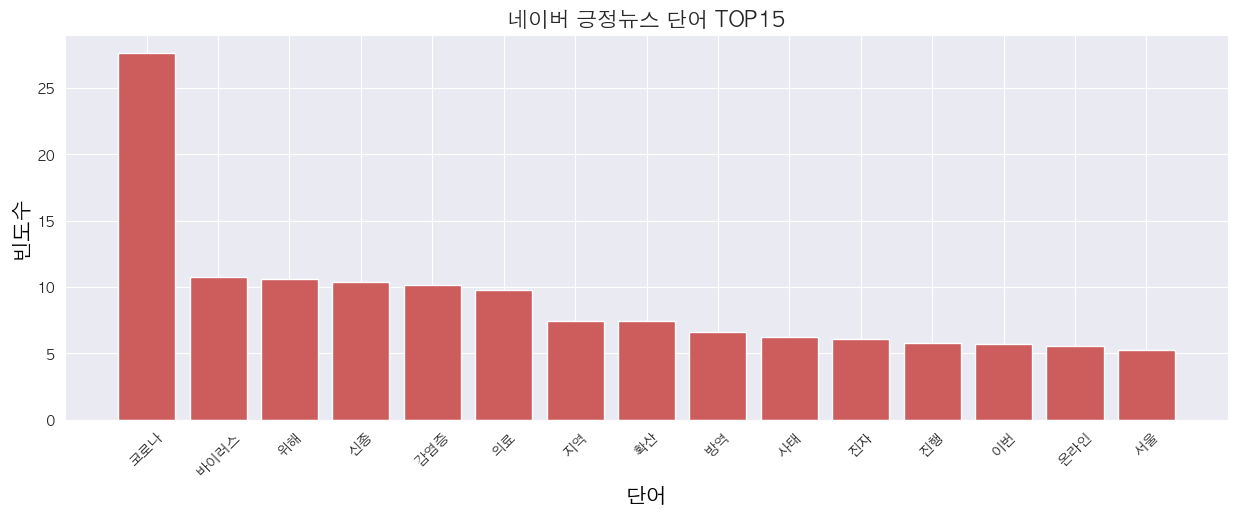

In [161]:
max = 15
plt.figure(figsize=(15, 5))
plt.bar(range(max), [i[1] for i in posWords[:max]], color = 'indianred')


plt.title('네이버 긍정뉴스 단어 TOP15', fontsize=15)
plt.xlabel('단어', fontsize=15, color = 'black')
plt.ylabel('빈도수', fontsize=15, color = 'black')

# x축 단어 표시
plt.xticks(range(max), [i[0] for i in posWords[:max]], rotation=45)


plt.show()